In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# 1. Read csv file and take a quick look at the dataframe

In [19]:
df = pd.read_csv("stroke_cleaned.csv")

In [21]:
df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,residence_type
893,42482,Female,4.00,0,0,No,children,62.61,21.2,Missing,0,Urban
1493,27013,Male,2.00,0,0,No,children,78.98,15.1,Missing,0,Urban
729,1246,Female,43.00,0,0,Yes,Govt_job,107.42,28.1,never smoked,0,Rural
3434,27518,Male,14.00,0,0,No,Self-employed,72.28,19.0,Missing,0,Rural
1499,45357,Female,1.24,0,0,No,children,113.96,21.5,Missing,0,Rural


In [98]:
df.shape

(5110, 12)

In [100]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
residence_type        object
dtype: object

In [102]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
residence_type       0
dtype: int64

In [104]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke',
       'residence_type'],
      dtype='object')

In [106]:
# list all unique values for each column
{col: df[col].unique() for col in df.select_dtypes(include='object').columns}

{'gender': array(['Male', 'Female', 'Other'], dtype=object),
 'ever_married': array(['Yes', 'No'], dtype=object),
 'work_type': array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
       dtype=object),
 'smoking_status': array(['formerly smoked', 'never smoked', 'smokes', 'Missing'],
       dtype=object),
 'residence_type': array(['Urban', 'Rural'], dtype=object)}

In [23]:
# replace all object type value to lower_case
df_obj = df.select_dtypes(include='object')
df[df_obj.columns] = df_obj.apply(lambda col: col.str.lower())

# 2. Use SQL for Simple Exploratory Data Analysis

In [108]:
df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,residence_type
1820,47608,female,21.00,0,0,no,private,208.17,24.9,never smoked,0,urban
3295,29955,male,0.08,0,0,no,children,70.33,16.9,missing,0,rural
1662,51883,female,52.00,0,0,yes,govt_job,69.11,35.2,never smoked,0,rural
4700,47216,male,47.00,0,0,yes,private,110.14,30.5,smokes,0,rural
4763,19191,male,82.00,0,0,yes,private,217.57,33.5,formerly smoked,0,urban


In [12]:
#pip install pandas sqlite3

In [110]:
# import sqlite3 to use sql query
import sqlite3

In [112]:
# create into mydata database and my_table and connect them with sqlite3
conn = sqlite3.connect("mydata.db")
df.to_sql("my_table", conn, if_exists = "replace", index=False)

5110

In [114]:
# Count the number of people who had a stroke and those who did not
result=pd.read_sql_query("""
SELECT stroke, count(stroke) as count
FROM my_table 
GROUP BY stroke;
""", conn)
print(result)

# We can see that the output variable (stroke) is highly unbalanced.

   stroke  count
0       0   4861
1       1    249


In [116]:
# Explore min, max, average age of participants
result=pd.read_sql_query("""
SELECT MIN(age) as min_age, MAX(age) as max_age, AVG(age) as mean_age
FROM my_table;
""", conn)
print(result)

   min_age  max_age   mean_age
0     0.08     82.0  43.226614


In [118]:
conn.close()

# 3. Preprocessing the data before modeling (One-hot encoding, scaling)

In [25]:
{col: df[col].unique() for col in df.select_dtypes(include='object').columns}

{'gender': array(['male', 'female', 'other'], dtype=object),
 'ever_married': array(['yes', 'no'], dtype=object),
 'work_type': array(['private', 'self-employed', 'govt_job', 'children', 'never_worked'],
       dtype=object),
 'smoking_status': array(['formerly smoked', 'never smoked', 'smokes', 'missing'],
       dtype=object),
 'residence_type': array(['urban', 'rural'], dtype=object)}

In [27]:
# One hot encoding for categorical columns
df2 = pd.get_dummies(data=df, columns = ['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status'])

for col in df2:
    if df2[col].dtypes == 'bool':
        df2[col] = df2[col].astype(int)

df2.sample(3)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_female,gender_male,gender_other,...,work_type_govt_job,work_type_never_worked,work_type_private,work_type_self-employed,residence_type_rural,residence_type_urban,smoking_status_formerly smoked,smoking_status_missing,smoking_status_never smoked,smoking_status_smokes
5076,39935,34.0,0,0,174.37,23.0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
1066,54782,30.0,0,0,56.07,31.3,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
4191,24262,31.0,0,0,70.91,28.3,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0


In [29]:
# scaling numeric columns (MinMax Scaler)

scaling_column = ['age', 'avg_glucose_level', 'bmi']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[scaling_column] = scaler.fit_transform(df2[scaling_column])

df2.sample(3)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_female,gender_male,gender_other,...,work_type_govt_job,work_type_never_worked,work_type_private,work_type_self-employed,residence_type_rural,residence_type_urban,smoking_status_formerly smoked,smoking_status_missing,smoking_status_never smoked,smoking_status_smokes
3008,563,0.499512,0,0,0.745961,0.296678,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
3829,6171,0.072266,0,0,0.163789,0.072165,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
2505,30491,0.475098,0,0,0.109777,0.187858,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [31]:
# Divide dataset into two part (input / output variables)
X = df2.drop(['id', 'stroke'], axis = 'columns')
y = df2['stroke']

# 4. Make function to select best model among the three algorithms
(Neural Network, KNearest-neighber, Random Forest

In [77]:
from sklearn.metrics import confusion_matrix, classification_report

# Build a function for selecting highest performance model among the three algorithms (Neural Network, KNN, Random Forest)
def Select_Model(X, y, ANN_weights = -1, ANN_epochs = 20):

    # 1. Mitigate class imbalance in the target variable using the SMOTE method.
    ## The 'stroke' variable is highly skewed toward the negative class (stroke = False)
    from imblearn.over_sampling import SMOTE
    smote = SMOTE(sampling_strategy = 'minority')
    X_sm, y_sm = smote.fit_resample(X,y)

    # 2. train-test split with SMOTE dataset
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size=0.2, random_state = 15)
    
    # 3. Build an ANN model function
    def ANN(X_train, y_train, X_test, y_test, ANN_weights, ANN_epochs):

        ## 3-1. create ANN model with 1 hidden layer
        ANN_model = keras.Sequential([
            keras.layers.Dense(21, input_dim = 21, activation = 'relu'),
            keras.layers.Dense(15, activation = 'relu'),
            keras.layers.Dense(1, activation = 'sigmoid')])
    
        ANN_model.compile(optimizer = 'adam', loss='binary_crossentropy', 
                      metrics=['accuracy'])

        ## 3-2. fit the model
        if ANN_weights == -1:
            ANN_model.fit(X_train, y_train, epochs = ANN_epochs)
        else:
            ANN_model.fit(X_train, y_train, epochs = ANN_epochs, class_weight = ANN_weights)
    
        ANN_y_preds = ANN_model.predict(X_test)
        ANN_y_preds = np.round(ANN_y_preds)

        ## 3-3. Performance metrics
        ### The goal of this model is to assess how well it identifies true stroke patients (i.e., minimizing false negatives).
        ### Therefore, we will focus on recall and F1-score of positive class (stroke = True)
        ANN_metrics = classification_report(y_test, ANN_y_preds, output_dict = True)
        ANN_recall = ANN_metrics['1']['recall'] 
        ANN_f1_score = ANN_metrics['1']['f1-score']

        ## 3-4. Return the recall and f1_score 
        return ANN_recall, ANN_f1_score


    # 4. Build a KNN model function
    def KNN(X_train, y_train, X_test, y_test):
        from sklearn.neighbors import KNeighborsClassifier
        from sklearn.pipeline import Pipeline

        ## 4-1. Full Cross Validation Grid Search for finding best K-value
        from sklearn.model_selection import GridSearchCV
        knn = KNeighborsClassifier()
        pipe = Pipeline([('knn', knn)])
        k_values = list(range(1,20))
        param_grid = {'knn__n_neighbors': k_values}

        full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring = 'accuracy')
        full_cv_classifier.fit(X_train, y_train)
        best_k_value = full_cv_classifier.best_params_['knn__n_neighbors']

        ## 4-2. Create KNN model and fit the model
        knn_model = KNeighborsClassifier(n_neighbors = best_k_value)
        knn_model.fit(X_train, y_train)
        KNN_y_preds = knn_model.predict(X_test)

        ## 4-3. Performance metrics
        ### recall and f1-score for positive class (stroke = True)
        KNN_metrics = classification_report(y_test, KNN_y_preds, output_dict = True)
        KNN_recall = KNN_metrics['1']['recall'] 
        KNN_f1_score = KNN_metrics['1']['f1-score']

        ## 4-4. Return the recall and f1_score 
        return KNN_recall, KNN_f1_score, best_k_value
        

    # 5. Build a Random forest model
    def RF(X_train, y_train, X_test, y_test):
        from sklearn.ensemble import RandomForestClassifier
        
        ## 5-1. Find best parameter
        n_estimators = [32, 64, 100, 128]
        max_features = [2,3,4]
        bootstrap = [True, False]
        oob_score = [True, False]
        param_grid_rf = {'n_estimators': n_estimators,
                         'max_features': max_features,
                         'bootstrap': bootstrap,
                         'oob_score': oob_score}
        rfc = RandomForestClassifier()
        grid = GridSearchCV(rfc, param_grid_rf)
        grid.fit(X_train, y_train)
        grid.best_params_

        ## 5-2. predict with best parameters
        RF_y_preds = grid.predict(X_test)

        ## 5-3. Performance metrics
        RF_metrics = classification_report(y_test, RF_y_preds, output_dict = True)
        RF_recall = RF_metrics['1']['recall'] 
        RF_f1_score = RF_metrics['1']['f1-score']
        n_estimators = grid.best_params_['n_estimators']
        max_features = grid.best_params_['max_features']

        ## 5-4. Return the recall and f1_score 
        return RF_recall, RF_f1_score, n_estimators, max_features


    # 6. Excute three models and Create performance metrics table to compare three models
    ANN_recall, ANN_f1_score = ANN(X_train, y_train, X_test, y_test, ANN_weights, ANN_epochs)
    KNN_recall, KNN_f1_score, best_k_value = KNN(X_train, y_train, X_test, y_test)
    RF_recall, RF_f1_score, n_estimators, max_features = RF(X_train, y_train, X_test, y_test)
    
    result_metrics = pd.DataFrame({
        'model': ['ANN', 'KNN', 'Random_Forest'],
        'recall': [ANN_recall, KNN_recall, RF_recall],
        'f1_score': [ANN_f1_score, KNN_f1_score, RF_f1_score],
        'parameter': [[ANN_weights, ANN_epochs], [best_k_value], [n_estimators, max_features]]
    })

    best_model = result_metrics.loc[result_metrics['recall'].idxmax(), 'model']
    best_para = result_metrics.loc[result_metrics['recall'].idxmax(), 'parameter']
    print(f'The best model is {best_model}, parameter : {best_para}')
    
    return result_metrics    

In [120]:
Select_Model(X, y, ANN_weights = -1, ANN_epochs=20)

Epoch 1/20


/opt/anaconda3/envs/tf_m3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6268 - loss: 0.6420
Epoch 2/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7474 - loss: 0.5242
Epoch 3/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8024 - loss: 0.4561
Epoch 4/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8115 - loss: 0.4226
Epoch 5/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8045 - loss: 0.4231
Epoch 6/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8107 - loss: 0.4079
Epoch 7/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7983 - loss: 0.4209
Epoch 8/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8072 - loss: 0.4151
Epoch 9/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8076 - loss: 0.4057
Epoch 10/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8061 - loss: 0.4089
Epoch 11/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8022 - loss: 0.4199
Epoch 12/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy

/opt/anaconda3/envs/tf_m3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/tf_m3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/tf_m3/lib/python3.10/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/anaconda3/envs/tf_m3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 448, in fit
    raise ValueError("

The best model is Random_Forest, parameter : [100, 2]


,model,recall,f1_score,parameter
0,ANN,0.849257,0.809717,"[-1, 20]"
1,KNN,0.966030,0.921519,[1]
2,Random_Forest,0.969214,0.939300,"[100, 2]"


# 5. Permutation Feature Importance
### * Now we found the best model is Random Forest.
### * Next, let's find the most "important" feature in this model

In [81]:
# mitigate class imbalance of target variable
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_resample(X,y)

# train-test split with SMOTE dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size=0.2, random_state = 15)

In [85]:
# we already knew best model is random forest (n_estimator = 100, max_features =2)
# let's use this model for permutation feature importance
rfc = RandomForestClassifier(n_estimators = 100, max_features = 2, random_state=101)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=2, random_state=101)

In [95]:
from sklearn.inspection import permutation_importance

result = permutation_importance(estimator = rfc,
                                X = X_test,
                                y = y_test,
                                scoring = 'recall',
                                n_repeats = 50,
                                random_state = 100)

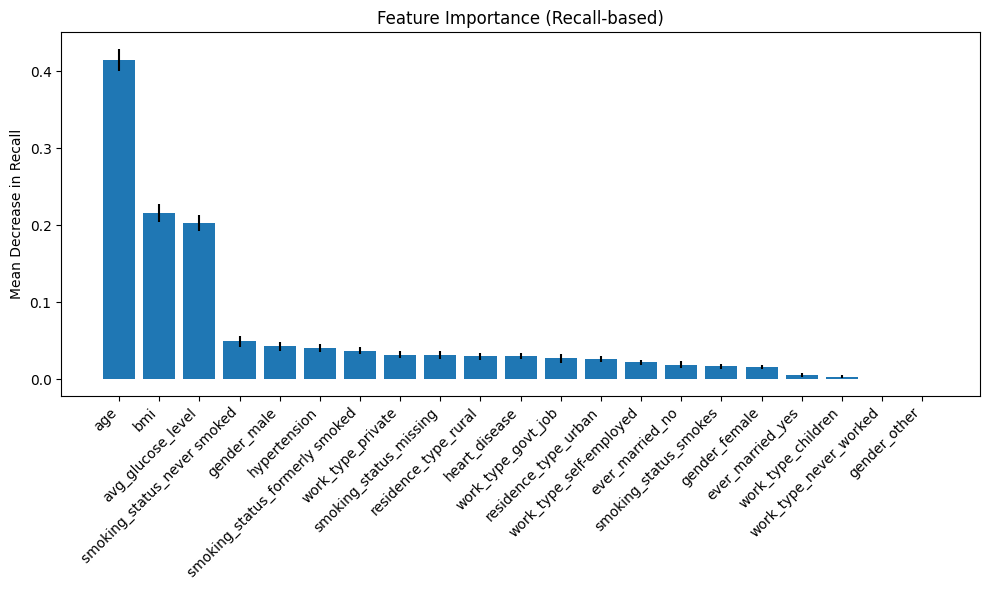

In [105]:
# Create the plot

importances = result.importances_mean
std = result.importances_std
features = X_test.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize = (10,6))
plt.title("Feature Importance (Recall-based)")
plt.bar(range(len(features)), importances[indices], yerr=std[indices], align = 'center')
plt.xticks(range(len(features)), features[indices], rotation= 45, ha='right')
plt.ylabel("Mean Decrease in Recall")
plt.tight_layout()
plt.show()

#Top 3 Features influencing stroke prediction are Age, BMI, and Glucose level.